# Law of Large Numbers: convergence on non-symmetric distributions

Written by ZWM.

Does the law of large numbers work for a non-symmetrical distribution? Let's build a little test.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def gen_normal(n_draws = 1000, E_x=8, E_sigma=1):
    """
    Generator for normally distributed values
    """
    for _ in range(n_draws):
        yield np.random.normal(E_x, E_sigma)
        
def gen_poisson(n_draws = 1000, E_x=2):
    """
    Generator for values from a Poisson (non-symmetric) distribution
    """
    for _ in range(n_draws):
        yield np.random.poisson(E_x)

def check_convergence_to_mean(func = gen_normal, **kwargs):
    """
    Asks the generator specified by "func" to send in measurements
    of the distribution, then tracks what the mean value is compared
    to how many measurements we've seen.
    """
    history = []
    current_value = 0
    current_count = 0
    for measure in func(**kwargs):
        current_value += measure
        current_count += 1
        history.append(current_value/current_count)
    return history

def plot_history(history):
    """
    Plots the sum vs the number of measurements taken
    """
    plt.figure(dpi=150)
    plt.plot(range(len(history)), history);

#### Try it with the normal distribution

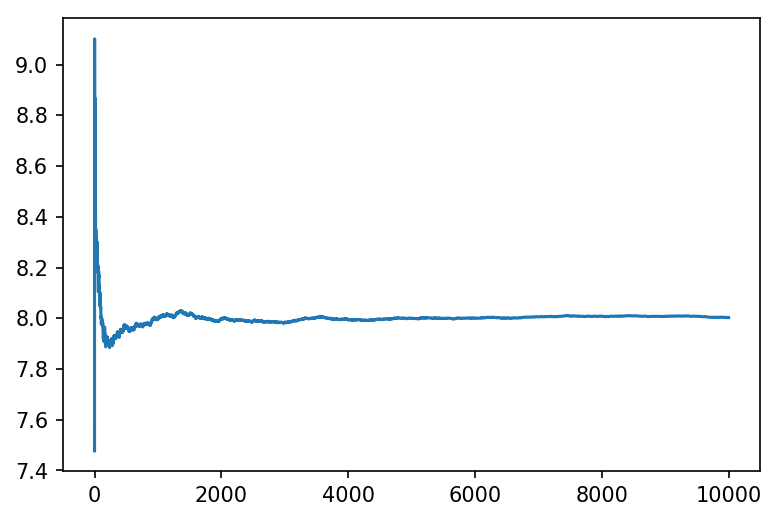

In [28]:
history = check_convergence_to_mean(n_draws=10000)
plot_history(history)

#### Now with Poisson

First, let's look at how the poisson distribution is... distributed _(YEEEAAAHHHHH!)_

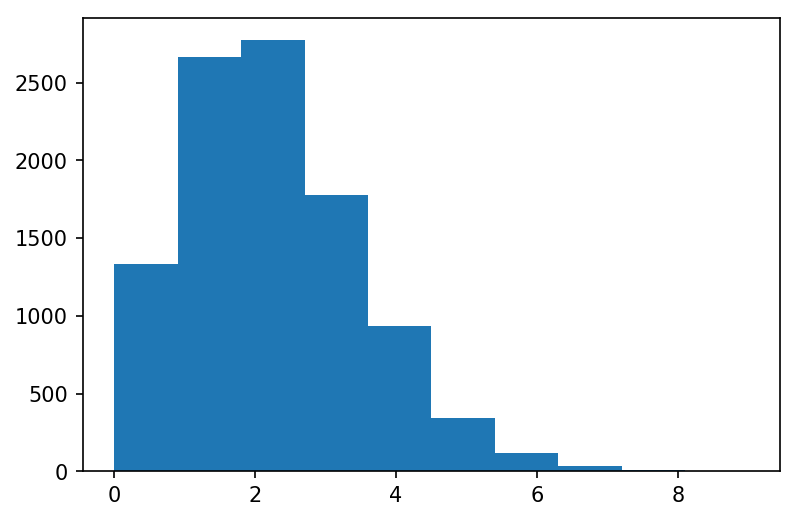

In [35]:
plt.figure(dpi=150)
np.random.seed(42)
plt.hist(np.random.poisson(2,size=(10000)));

and the history...

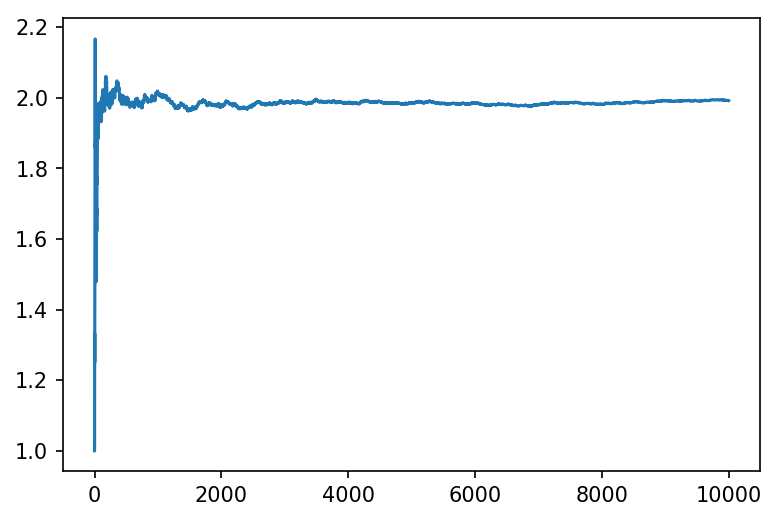

In [36]:
history = check_convergence_to_mean(n_draws=10000, func=gen_poisson)
plot_history(history)